In [1]:
from google.colab import files
files.upload()

{}

In [2]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [3]:
#!kaggle datasets download -d lakshanaravishankar/veremi-extension-final
!kaggle datasets download -d cyberdeeplearning/veremi-extension-clean-data


Dataset URL: https://www.kaggle.com/datasets/cyberdeeplearning/veremi-extension-clean-data
License(s): unknown
 98% 398M/405M [00:05<00:00, 68.5MB/s]
100% 405M/405M [00:05<00:00, 77.7MB/s]


In [4]:
import zipfile
with zipfile.ZipFile("veremi-extension-clean-data.zip", 'r') as zip_ref:
    zip_ref.extractall("veremi-extension-final")


In [5]:
import os
os.listdir("veremi-extension-final")


['mixalldata_clean.csv']

In [6]:
import os

# Function to get the size of the folder
def get_folder_size(folder_path):
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(folder_path):
        for f in filenames:
            fp = os.path.join(dirpath, f)
            total_size += os.path.getsize(fp)
    return total_size

# Calculate and print the size of the dataset folder
folder_size = get_folder_size("veremi-extension-final")  # Replace with your extracted folder name
print(f"Total size of the dataset: {folder_size / (1024*1024):.2f} MB")


Total size of the dataset: 1157.25 MB


In [7]:
import pandas as pd

# Replace 'your_file.csv' with the actual file namVeremi_Extensiine of the CSV you want to load
df_veremi = pd.read_csv('/content/veremi-extension-final/mixalldata_clean.csv')
# Display the first few rows of the DataFrame to verify it's loaded correctly
df_veremi.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3194808 entries, 0 to 3194807
Data columns (total 30 columns):
 #   Column        Dtype  
---  ------        -----  
 0   type          int64  
 1   sendTime      float64
 2   sender        int64  
 3   senderPseudo  int64  
 4   messageID     int64  
 5   class         int64  
 6   posx          float64
 7   posy          float64
 8   posz          float64
 9   posx_n        float64
 10  posy_n        float64
 11  posz_n        float64
 12  spdx          float64
 13  spdy          float64
 14  spdz          float64
 15  spdx_n        float64
 16  spdy_n        float64
 17  spdz_n        float64
 18  aclx          float64
 19  acly          float64
 20  aclz          float64
 21  aclx_n        float64
 22  acly_n        float64
 23  aclz_n        float64
 24  hedx          float64
 25  hedy          float64
 26  hedz          float64
 27  hedx_n        float64
 28  hedy_n        float64
 29  hedz_n        float64
dtypes: float64(25), in

The `df_veremi` DataFrame appears to be an extended version of a dataset related to vehicular communication and positioning, likely involving various types of attacks on a vehicular network. Here's an explanation of each field in the extended `df_veremi` DataFrame:

1. **type**: Likely indicates the type of message or data being sent or the category of the vehicle or device involved.

2. **sendTime**: The timestamp indicating when the message or data was sent. This is crucial for understanding the timing of events and synchronizing data from different sources.

3. **sender**: The identifier for the sender of the message. In a vehicular network, this could be the unique ID of the vehicle or device transmitting the data.

4. **senderPseudo**: A pseudonym for the sender, possibly used for privacy reasons to anonymize the actual sender while still maintaining traceability.

5. **messageID**: A unique identifier for each message, allowing for tracking and differentiation between different messages sent by the same or different senders.

6. **class**: This field likely categorizes the type of behavior or event. In this context, the values range from 0 to 19, representing different scenarios such as normal behavior, faults, or attacks.

7. **posx, posy, posz**: These fields represent the X, Y, and Z coordinates of the vehicle's position, respectively. They are essential for determining the vehicle's location in a three-dimensional space.

8. **posx_n, posy_n, posz_n**: These likely represent the normalized X, Y, and Z coordinates, respectively. Normalization typically scales values to a standard range, which can be useful for machine learning models or comparative analysis.

9. **spdx, spdy, spdz**: These fields represent the speed components in the X, Y, and Z directions, respectively. They provide a vector that describes the vehicle's velocity in three-dimensional space.

10. **spdx_n, spdy_n, spdz_n**: These are the normalized speed components in the X, Y, and Z directions. Like position normalization, speed normalization scales the velocity data to a standard range.

11. **aclx, acly, aclz**: These fields represent the acceleration components in the X, Y, and Z directions, respectively. Acceleration data is useful for understanding changes in vehicle speed and direction.

12. **aclx_n, acly_n, aclz_n**: These are the normalized acceleration components in the X, Y, and Z directions. Normalized acceleration data can help in analyzing movements on a comparable scale.

13. **hedx, hedy, hedz**: These fields likely represent the heading or orientation of the vehicle in the X, Y, and Z directions. This data helps in understanding the direction in which a vehicle is pointed.

14. **hedx_n, hedy_n, hedz_n**: These are the normalized heading components in the X, Y, and Z directions. Normalizing heading data can assist in more consistent analyses across different vehicles or situations.

15. **Attack**: This field indicates whether the data point is classified as "Normal", "Fault", or "Attack". It summarizes the general behavior of the vehicle or network based on the 'class' value.

16. **Attack_type**: This field provides a more detailed description of the type of behavior or attack, such as "Normal behavior", "Constant position", "Data replay", "DoS", etc. It adds granularity to the `Attack` field by specifying the exact nature of the attack or fault.

The `df_veremi` DataFrame appears to be designed for analyzing vehicular communication data with a focus on understanding normal operations, faults, and potential attack scenarios. This dataset could be used in developing and testing security measures for connected and autonomous vehicles (CAVs).

In [8]:
df_veremi.head()

,type,sendTime,sender,senderPseudo,messageID,class,posx,posy,posz,posx_n,...,aclz,aclx_n,acly_n,aclz_n,hedx,hedy,hedz,hedx_n,hedy_n,hedz_n
0,4,72002.302942,130137,101301377,422013806,0,266.982401,32.336955,0.0,3.480882,...,0.0,0.000862,0.000862,0.0,-0.102790,0.994703,0.0,20.038218,17.541001,0.0
1,4,72003.302942,130137,101301377,422023410,0,266.827208,34.624145,0.0,3.546261,...,0.0,0.000107,0.001040,0.0,-0.099856,0.995002,0.0,20.441139,14.467283,0.0
2,4,72004.302942,130137,101301377,422032081,0,266.420297,38.836461,0.0,3.544045,...,0.0,0.000172,0.001661,0.0,-0.099856,0.995002,0.0,20.850473,11.941528,0.0
3,4,72005.302942,130137,101301377,422040712,0,268.912026,45.414229,0.0,3.340080,...,0.0,0.000171,0.001654,0.0,-0.100172,0.994970,0.0,21.323229,9.633965,0.0
4,4,72006.302942,130137,101301377,422052949,0,268.242276,53.729986,0.0,3.328872,...,0.0,0.000193,0.001852,0.0,-0.097105,0.995274,0.0,21.788034,7.824555,0.0


In [9]:
# Display the value counts for the 'type' feature
df_veremi['class'].value_counts()


,count
class,
0,1900539
16,175391
13,131305
15,129270
14,126724
18,86883
19,82100
6,44359
11,44337


* 9  Attack                Disruptive    3776
* 10  Attack               Data replay    3870
* 11  Attack                       DoS   12564
* 12  Attack                DoS random   12103
* 13  Attack            DoS disruptive   12370
* 14  Attack         Data replay sybil   16981
* 15  Attack  Traffic congestion sybil    3876
* 16  Attack          DoS random sybil    8122
* 17  Attack      DoS disruptive sybil    7654


In [17]:
# Define class groups
benign_class = [0]
attack_classes = [1, 3, 5, 6,9,10,11,12, 13, 14, 15,16,17]

# Sample 2500 benign records
df_benign = df_veremi[df_veremi['class'].isin(benign_class)].sample(n=2500, random_state=42)

# Sample ~357 records from each of 7 attack classes to get ~2500 total
samples_per_attack_class = 2500 // len(attack_classes)
df_attacks = pd.concat([
    df_veremi[df_veremi['class'] == cls].sample(n=samples_per_attack_class, random_state=42)
    for cls in attack_classes
])

# Combine balanced dataset
df_balanced = pd.concat([df_benign, df_attacks]).sample(frac=1, random_state=42).reset_index(drop=True)

# Add one more benign record to reach exactly 5000
remaining = 5000 - len(df_balanced)
extra_benign = df_veremi[df_veremi['class'] == 0].sample(n=remaining, random_state=43)

# Append and shuffle
df_balanced = pd.concat([df_balanced, extra_benign]).sample(frac=1, random_state=44).reset_index(drop=True)

df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          5000 non-null   int64  
 1   sendTime      5000 non-null   float64
 2   sender        5000 non-null   int64  
 3   senderPseudo  5000 non-null   int64  
 4   messageID     5000 non-null   int64  
 5   class         5000 non-null   int64  
 6   posx          5000 non-null   float64
 7   posy          5000 non-null   float64
 8   posz          5000 non-null   float64
 9   posx_n        5000 non-null   float64
 10  posy_n        5000 non-null   float64
 11  posz_n        5000 non-null   float64
 12  spdx          5000 non-null   float64
 13  spdy          5000 non-null   float64
 14  spdz          5000 non-null   float64
 15  spdx_n        5000 non-null   float64
 16  spdy_n        5000 non-null   float64
 17  spdz_n        5000 non-null   float64
 18  aclx          5000 non-null 

In [19]:
# Drop columns ending with '_n' from df_veremi
df_balanced = df_balanced.drop(columns=[col for col in df_balanced.columns if col.endswith('_n')])

# Display the updated DataFrame structure
print(df_balanced.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          5000 non-null   int64  
 1   sendTime      5000 non-null   float64
 2   sender        5000 non-null   int64  
 3   senderPseudo  5000 non-null   int64  
 4   messageID     5000 non-null   int64  
 5   class         5000 non-null   int64  
 6   posx          5000 non-null   float64
 7   posy          5000 non-null   float64
 8   posz          5000 non-null   float64
 9   spdx          5000 non-null   float64
 10  spdy          5000 non-null   float64
 11  spdz          5000 non-null   float64
 12  aclx          5000 non-null   float64
 13  acly          5000 non-null   float64
 14  aclz          5000 non-null   float64
 15  hedx          5000 non-null   float64
 16  hedy          5000 non-null   float64
 17  hedz          5000 non-null   float64
dtypes: float64(13), int64(5)
mem

In [20]:
df_balanced['class'].value_counts().sort_index(ascending=True)


,count
class,
0,2504
1,192
3,192
5,192
6,192
9,192
10,192
11,192
12,192


In [23]:
df_balanced['label'] = df_balanced['class'].apply(lambda x: 0 if x == 0 else 1)


In [25]:
df_balanced['label'].value_counts()

,count
label,
0,2504
1,2496


In [26]:
df_balanced.to_csv("veremi_balanced_5000.csv", index=False)

Dataset shape: (5000, 19)

Class distribution:
 class
0     2504
13     192
17     192
1      192
12     192
15     192
11     192
10     192
6      192
16     192
3      192
9      192
14     192
5      192
Name: count, dtype: int64

Label distribution:
 label
0    2504
1    2496
Name: count, dtype: int64

Statistical summary:
                count          mean           std           min           25%  \
type          5000.0  4.000000e+00  0.000000e+00      4.000000  4.000000e+00   
sendTime      5000.0  5.086624e+04  1.814976e+04    816.099615  3.332482e+04   
sender        5000.0  7.406459e+04  4.190242e+04     51.000000  3.793500e+04   
senderPseudo  5000.0  6.944719e+07  2.481834e+08      1.000000  1.038517e+07   
messageID     5000.0  2.277086e+08  1.369316e+08  46978.000000  1.189534e+08   
class         5000.0  5.068800e+00  6.144234e+00      0.000000  0.000000e+00   
posx          5000.0  6.001885e+02  4.003582e+02      0.000000  2.272842e+02   
posy          5000.0  6.55942

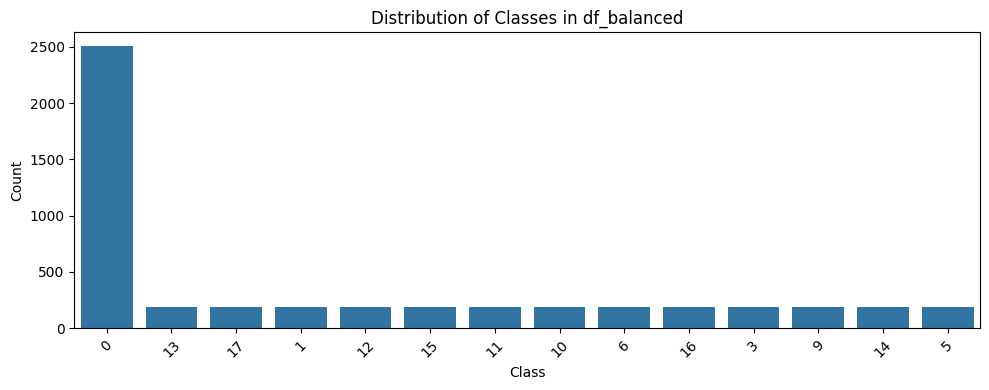

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Basic summary
print("Dataset shape:", df_balanced.shape)
print("\nClass distribution:\n", df_balanced['class'].value_counts())
print("\nLabel distribution:\n", df_balanced['label'].value_counts())
print("\nStatistical summary:\n", df_balanced.describe().T)

# Plot class distribution
plt.figure(figsize=(10, 4))
sns.countplot(x='class', data=df_balanced, order=df_balanced['class'].value_counts().index)
plt.title("Distribution of Classes in df_balanced")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


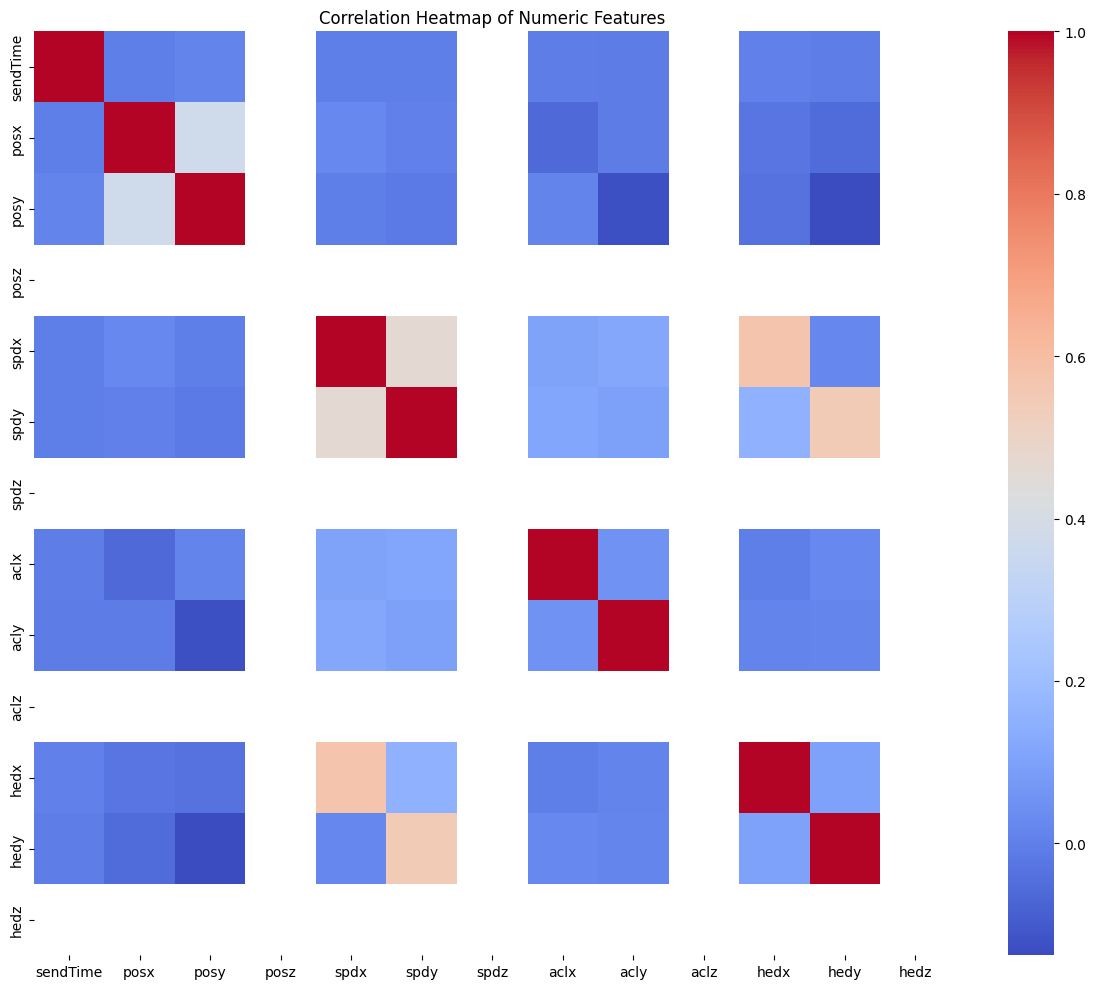

In [28]:

# Correlation heatmap for selected numeric features
numeric_cols = df_balanced.select_dtypes(include='float64').columns
plt.figure(figsize=(12, 10))
sns.heatmap(df_balanced[numeric_cols].corr(), cmap='coolwarm', annot=False, fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()



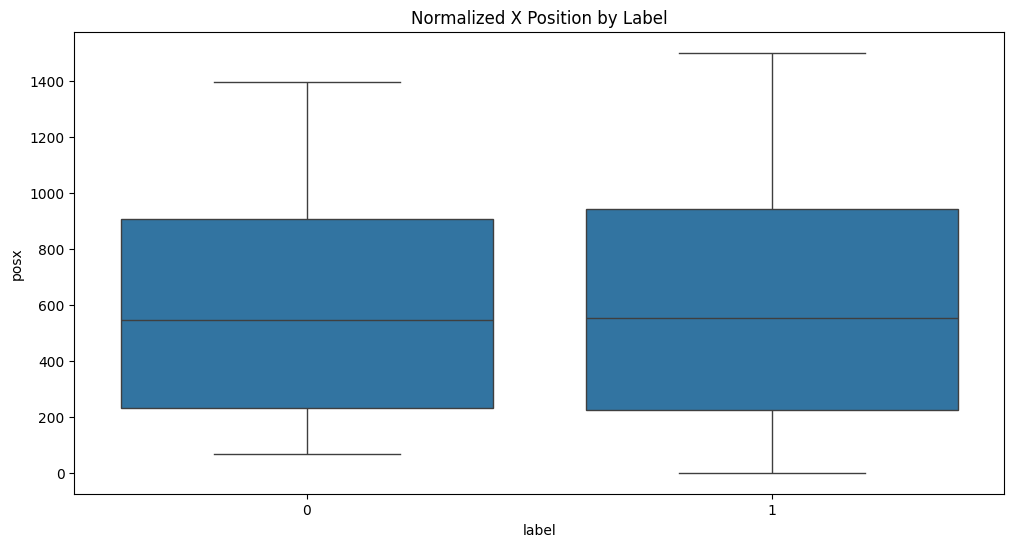

In [30]:
# Boxplot: Position (normalized) by Label
plt.figure(figsize=(12, 6))
sns.boxplot(x='label', y='posx', data=df_balanced)
plt.title("Normalized X Position by Label")
plt.show()


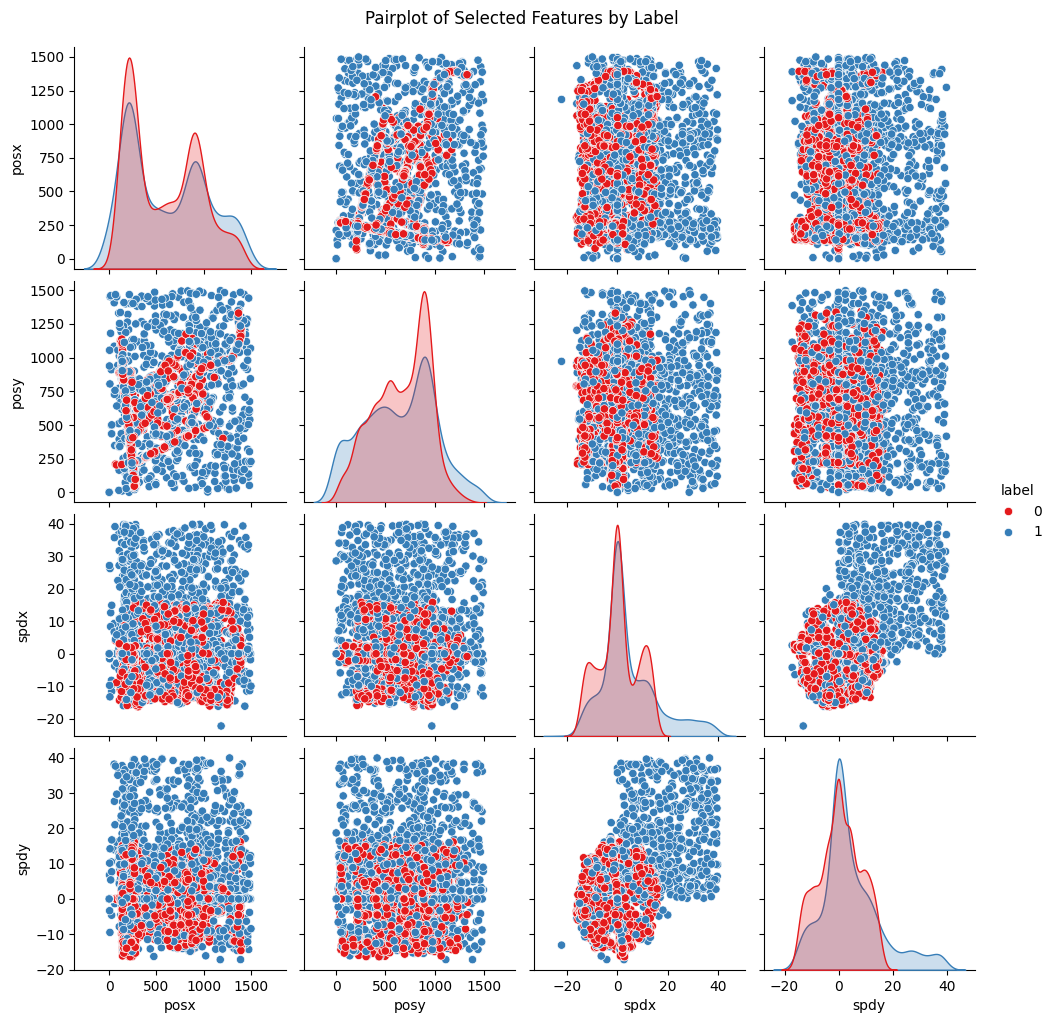

In [31]:

# Pairplot on selected features
selected_features = ['posx', 'posy', 'spdx', 'spdy', 'label']
sns.pairplot(df_balanced[selected_features], hue='label', palette='Set1', diag_kind='kde')
plt.suptitle("Pairplot of Selected Features by Label", y=1.02)
plt.show()
